<a href="https://colab.research.google.com/github/Pratyush1110/Machine-Learning/blob/main/HandsOnML/Chp4/Chp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression

### The Normal Equation

$$\hat{\theta} = (X^T X)^{-1} X^T y$$

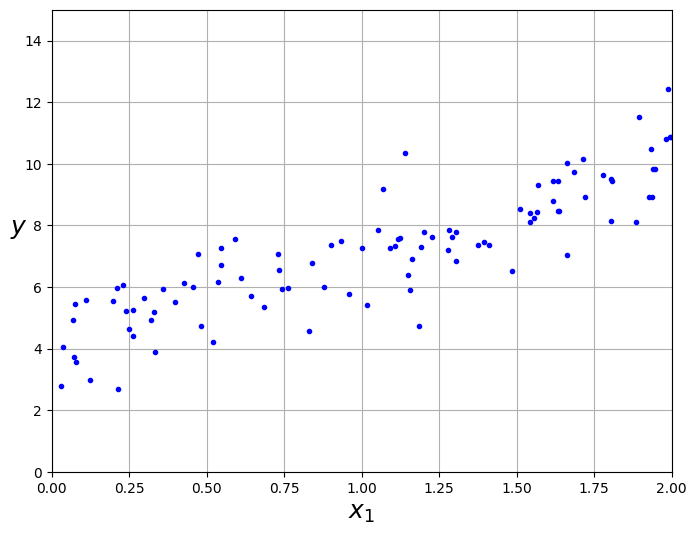

In [2]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.11982489],
       [2.90467591]])

$\theta_0 = 3.92$: The model estimated the intercept is 3.92 (very close to 4).

$\theta_1 = 2.89$: The model estimated the slope is 2.89 (very close to 3).

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11982489],
       [9.9291767 ]])

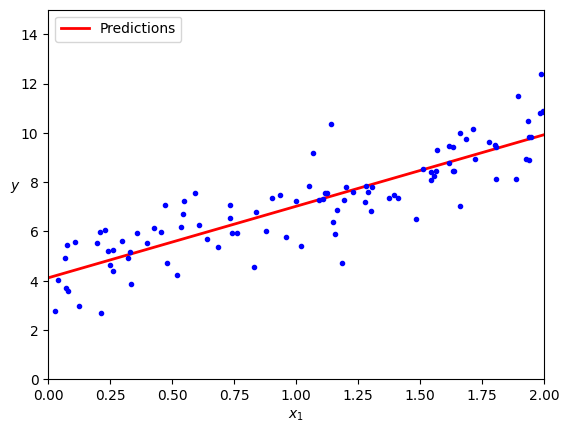

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions") # "r-" is a red line
plt.plot(X, y, "b.") # The original blue dots
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regressiong using ScikitLearn

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.11982489]), array([[2.90467591]]))

In [7]:
lin_reg.predict(X_new)

array([[4.11982489],
       [9.9291767 ]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.11982489],
       [2.90467591]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.11982489],
       [2.90467591]])

### Computational Complexity

1. Feature Heavy = Very Slow: Because the complexity is between $O(n^{2.4})$ and $O(n^3)$, doubling your features ($n$) makes the math roughly 5 to 8 times slower. It hits a "wall" around 100,000 features.

2. Data Heavy = Predictable: These methods are $O(m)$ (linear) regarding the number of instances ($m$). If you double the number of rows, it just takes twice as long.

3. The RAM Limit: You must be able to fit your entire dataset into memory at once. If the data is bigger than your RAM, these methods won't work.

4. SVD is the Modern Choice: Scikit-Learn uses SVD ($O(n^2)$) because it is faster and more stable than the Normal Equation, but it still struggles with massive feature sets compared to Gradient Descent.

# Gradient Descent

### Batch Gradient Descent

$$\frac{\partial}{\partial\theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)}) x_j^{(i)}$$

better written as : $$\nabla_{\theta} \text{MSE}(\theta) = \frac{2}{m} X^T (X \theta - y)$$

once we have this gradient vector, we can then use it to update our weights:$$\theta^{(\text{next step})} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta)$$

where, $$\eta$$ symbol is the learning rate.

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #calculate the slope
  theta = theta - eta * gradients                 #updae the theta

theta

array([[4.11982489],
       [2.90467591]])

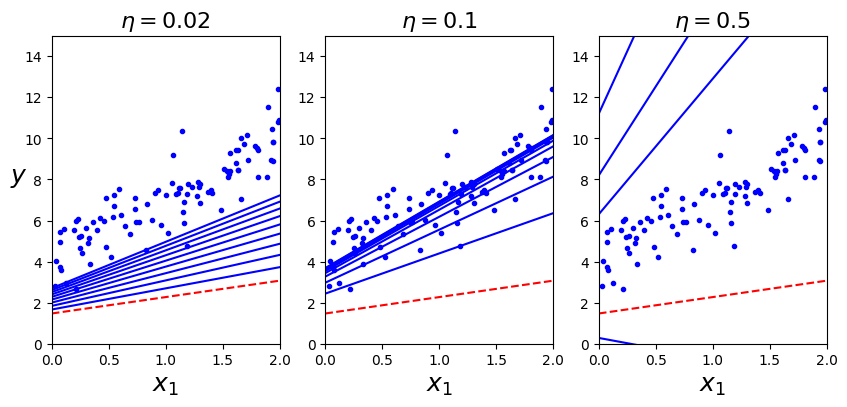

In [18]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10: # Only plot the first 10 steps to see the movement
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--" # Red dashed line for starting point
            plt.plot(X_new, y_predict, style)

        # The Gradient Descent Step
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

#3. Create the plots
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
theta_start = np.random.randn(2,1) # Start all three at the same random spot

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta_start, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta_start, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta_start, eta=0.5)

plt.show()

1. Left ($\eta = 0.02$): Too Low.Notice how the blue lines are very close together. The model is learning, but it is incredibly slow. It would take thousands of iterations to actually reach the best fit.

2. Middle ($\eta = 0.1$): Just Right.In just a few steps, the model has already converged to a line that fits the data well. This is the "Goldilocks" learning rate for this specific problem.

3. Right ($\eta = 0.5$): Too High.Look at the lines jumping all over the place! The algorithm "over-shoots" the minimum. Instead of settling at the bottom of the bowl, it bounces higher and higher up the opposite sides until it actually flies away from the data (diverges).

### Stochastic Gradient Descent (SGD)